In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_10_equil"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0936981996279025,0.0960494194437067,-1647210.521727,971597.032344405,0,0.317883640438742,0.0678063640913829,-39.3215159786091,1206.15243663507,2016-02-23T01:55:44+00:00
1,0.0994993578210523,0.0988904954640051,-4218642.43745005,1008576.03796221,3,1.11422252739453,0.0704960012494306,-521.16627803316,1252.27774458305,2016-02-23T01:56:19+00:00
2,0.0842734584328153,0.0920197719274851,-5107138.69107855,936699.971913363,4,1.02899227367686,0.0654646680061293,21.5124879401513,1162.98595311195,2016-02-23T01:56:31+00:00
3,-0.0118058574430152,0.0943303391354781,-3474266.67906452,961120.458520281,6,1.14763491903886,0.0671819943216354,139.251441221719,1193.32028383579,2016-02-23T01:56:53+00:00
4,0.0480059698746059,0.10225261730796,-5028959.36881261,1047296.61496003,7,1.12435095134424,0.073203775487301,325.643478014088,1300.52849043278,2016-02-23T01:57:04+00:00
5,0.160553857626371,0.0969741631385797,-4024401.2720575,1002988.62872157,9,1.08696985383279,0.0701012518669709,555.154170705831,1245.90437495157,2016-02-23T01:57:26+00:00
6,-0.0275878626799891,0.0972057513923691,-4716989.31884548,999958.287311034,10,1.14481512009852,0.0698964800801273,62.2876261759137,1241.90760445308,2016-02-23T01:57:37+00:00
7,0.0926156755360286,0.096207090941938,-5629122.64670684,997870.467851304,11,1.08620391083669,0.0697437792410604,427.124092791022,1239.67677799489,2016-02-23T01:57:49+00:00
8,0.0604968821201468,0.0973182070230547,-3458770.44688246,992091.145063204,13,1.05601271367362,0.0693383711776593,-45.7288500247294,1231.79755585331,2016-02-23T01:58:11+00:00
9,0.180067795274091,0.0970626653902179,-4211200.4495008,1002232.66174117,14,1.05716735805497,0.0700459806150861,643.142738087313,1244.88393414684,2016-02-23T01:58:22+00:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.0274544595581509,0.135874996462164,-3960731.69372986,1382844.85665717,29,11.5332404165943,0.0980782405313223,1408.59555278259,1716.35356599868,2016-02-23T02:01:21+00:00
1,-0.0909061350856766,0.214808858209382,-4866136.15766912,2189318.43319812,30,23.7882226458303,0.158217639053825,2356.24377329182,2716.29238637856,2016-02-23T02:01:32+00:00
2,-0.23987913351997,0.210744332962871,-3691333.60410821,2148465.54003217,31,23.7345174068354,0.155252298610659,2030.55456477698,2665.64086677353,2016-02-23T02:01:42+00:00
3,-0.0770165591201313,0.210399951395496,-4520987.61488979,2144346.46001664,32,23.8311026801524,0.154978294296064,2113.84008071129,2660.46011810896,2016-02-23T02:01:52+00:00
4,-0.26041956015762,0.209611074080044,-4101554.75054858,2135108.9174336,33,23.9023054707297,0.154327614615566,2781.97186449232,2648.93424105292,2016-02-23T02:02:02+00:00
5,-0.115870155752828,0.217492401056806,-5184432.49961951,2215773.79520197,34,23.6870251937333,0.160103501946529,1936.89744819736,2749.06230382295,2016-02-23T02:02:13+00:00
6,-0.14286633001678,0.210311928201627,-4308175.88420009,2144777.08493843,35,23.8606681773712,0.15501727532481,2155.28730574582,2661.05924508219,2016-02-23T02:02:23+00:00
7,-0.12908188682869,0.208918527439779,-5111372.30428128,2128990.39686864,36,23.7776043008851,0.153855130196221,2111.03123983928,2641.43980386339,2016-02-23T02:02:33+00:00
8,-0.206340232195499,0.214692547127215,-3876682.02147559,2187700.77385254,37,23.9263598106394,0.158135401557935,2293.4022953285,2714.22998530224,2016-02-23T02:02:43+00:00
9,-0.112668333337612,0.206878368819108,-4097934.39799863,2107739.65291901,38,23.8862397974016,0.152345675794923,2354.62529971525,2615.00071901415,2016-02-23T02:02:54+00:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0936981996279025,0.0960494194437067,-1647210.521727,971597.032344405,0,0.317883640438742,0.0678063640913829,-39.3215159786091,1206.15243663507,2016-02-23T01:55:44+00:00
1,0.0994993578210523,0.0988904954640051,-4218642.43745005,1008576.03796221,3,1.11422252739453,0.0704960012494306,-521.16627803316,1252.27774458305,2016-02-23T01:56:19+00:00
2,0.0842734584328153,0.0920197719274851,-5107138.69107855,936699.971913363,4,1.02899227367686,0.0654646680061293,21.5124879401513,1162.98595311195,2016-02-23T01:56:31+00:00
3,-0.0118058574430152,0.0943303391354781,-3474266.67906452,961120.458520281,6,1.14763491903886,0.0671819943216354,139.251441221719,1193.32028383579,2016-02-23T01:56:53+00:00
4,0.0480059698746059,0.10225261730796,-5028959.36881261,1047296.61496003,7,1.12435095134424,0.073203775487301,325.643478014088,1300.52849043278,2016-02-23T01:57:04+00:00
5,0.160553857626371,0.0969741631385797,-4024401.2720575,1002988.62872157,9,1.08696985383279,0.0701012518669709,555.154170705831,1245.90437495157,2016-02-23T01:57:26+00:00
6,-0.0275878626799891,0.0972057513923691,-4716989.31884548,999958.287311034,10,1.14481512009852,0.0698964800801273,62.2876261759137,1241.90760445308,2016-02-23T01:57:37+00:00
7,0.0926156755360286,0.096207090941938,-5629122.64670684,997870.467851304,11,1.08620391083669,0.0697437792410604,427.124092791022,1239.67677799489,2016-02-23T01:57:49+00:00
8,0.0604968821201468,0.0973182070230547,-3458770.44688246,992091.145063204,13,1.05601271367362,0.0693383711776593,-45.7288500247294,1231.79755585331,2016-02-23T01:58:11+00:00
9,0.180067795274091,0.0970626653902179,-4211200.4495008,1002232.66174117,14,1.05716735805497,0.0700459806150861,643.142738087313,1244.88393414684,2016-02-23T01:58:22+00:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:4712240 @name = nil @size = 10 >
                                      nil
                   0 2016-02-23T01:55:44+
                   1 2016-02-23T01:56:19+
                   2 2016-02-23T01:56:31+
                   3 2016-02-23T01:56:53+
                   4 2016-02-23T01:57:04+
                   5 2016-02-23T01:57:26+
                   6 2016-02-23T01:57:37+
                   7 2016-02-23T01:57:49+
                   8 2016-02-23T01:58:11+
                   9 2016-02-23T01:58:22+

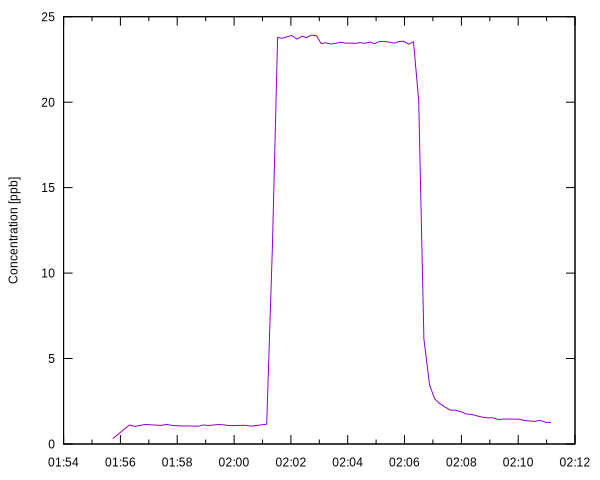

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-23T01:55:44+00:00,0.0936981996279025,0.0960494194437067,-1647210.521727,971597.032344405,0,0.317883640438742,0.0678063640913829,-39.3215159786091,1206.15243663507,2016-02-23T01:55:44+00:00,0.0
2016-02-23T01:56:19+00:00,0.0994993578210523,0.0988904954640051,-4218642.43745005,1008576.03796221,3,1.11422252739453,0.0704960012494306,-521.16627803316,1252.27774458305,2016-02-23T01:56:19+00:00,35.0
2016-02-23T01:56:31+00:00,0.0842734584328153,0.0920197719274851,-5107138.69107855,936699.971913363,4,1.02899227367686,0.0654646680061293,21.5124879401513,1162.98595311195,2016-02-23T01:56:31+00:00,47.0
2016-02-23T01:56:53+00:00,-0.0118058574430152,0.0943303391354781,-3474266.67906452,961120.458520281,6,1.14763491903886,0.0671819943216354,139.251441221719,1193.32028383579,2016-02-23T01:56:53+00:00,69.00000000000001
2016-02-23T01:57:04+00:00,0.0480059698746059,0.10225261730796,-5028959.36881261,1047296.61496003,7,1.12435095134424,0.073203775487301,325.643478014088,1300.52849043278,2016-02-23T01:57:04+00:00,80.00000000000001
2016-02-23T01:57:26+00:00,0.160553857626371,0.0969741631385797,-4024401.2720575,1002988.62872157,9,1.08696985383279,0.0701012518669709,555.154170705831,1245.90437495157,2016-02-23T01:57:26+00:00,102.00000000000001
2016-02-23T01:57:37+00:00,-0.0275878626799891,0.0972057513923691,-4716989.31884548,999958.287311034,10,1.14481512009852,0.0698964800801273,62.2876261759137,1241.90760445308,2016-02-23T01:57:37+00:00,112.99999999999997
2016-02-23T01:57:49+00:00,0.0926156755360286,0.096207090941938,-5629122.64670684,997870.467851304,11,1.08620391083669,0.0697437792410604,427.124092791022,1239.67677799489,2016-02-23T01:57:49+00:00,125.00000000000001
2016-02-23T01:58:11+00:00,0.0604968821201468,0.0973182070230547,-3458770.44688246,992091.145063204,13,1.05601271367362,0.0693383711776593,-45.7288500247294,1231.79755585331,2016-02-23T01:58:11+00:00,147.0
2016-02-23T01:58:22+00:00,0.180067795274091,0.0970626653902179,-4211200.4495008,1002232.66174117,14,1.05716735805497,0.0700459806150861,643.142738087313,1244.88393414684,2016-02-23T01:58:22+00:00,158.0


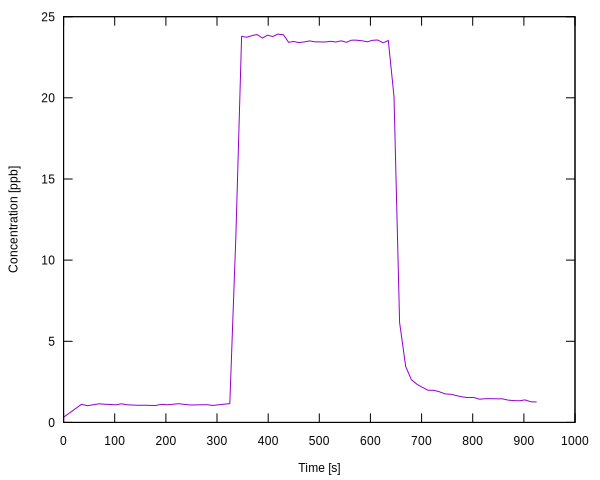

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

18
1.15568038321218
19
11.5332404165943
49
20.0842056487499


In [29]:
ts_fit = ts.row[49..(ts.nrows - 1)]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s,o3_mean
49,-0.0801072581372091,0.183740293819028,-3792311.57481926,1873160.89961867,30,20.0842056487499,0.134583116665864,1275.57030153647,2324.35840981516,2016-02-23T02:06:30+00:00,0.0,1834.935416661237
50,0.0164735927595001,0.108738727710878,-3598874.81053928,1108278.99150675,31,6.14738944871785,0.077993810292759,-3.86957429105366,1375.84514041626,2016-02-23T02:06:41+00:00,11.0,1671.5753981914866
51,0.00778023260685372,0.105890953574346,-5892727.1807176,1085012.57671809,32,3.44036732646642,0.0760761395228263,-644.596921236682,1347.3087373017,2016-02-23T02:06:53+00:00,23.0,1400.5293246530755
52,0.0538684336123169,0.0995567778339431,-3485823.47848829,1018245.4483648,33,2.63354847877384,0.0713168291669572,27.1497138733443,1264.35449330688,2016-02-23T02:07:04+00:00,33.999999999999886,1197.605289405095
53,0.150671642353508,0.095773736052408,-3219932.31509833,983285.153362961,34,2.34994062420962,0.0688422500949588,407.383308223103,1221.09430111746,2016-02-23T02:07:15+00:00,45.000000000000114,1086.8388951316783
54,0.0419325496905763,0.0943577260731269,-4135974.91578556,963813.400869237,35,2.15228604822124,0.067460728771812,179.023733157416,1196.72848904498,2016-02-23T02:07:26+00:00,56.000000000000114,901.574906207026
55,-0.00746915982853973,0.0945196084502627,-4102522.53180175,970825.346552603,36,1.97701298932683,0.0679358257228267,-27.7070687401494,1205.66004799785,2016-02-23T02:07:37+00:00,67.0,733.0714926395818
56,0.102385894819455,0.0970501670791353,-3410635.80036077,999401.29293078,37,1.97943148226449,0.0699349535707664,30.7894579063922,1241.24892068623,2016-02-23T02:07:48+00:00,78.0,529.950901060199
57,0.0998030449234204,0.0958888924705206,-3780403.29143398,976739.069160963,38,1.88749598642267,0.0683411109939498,325.943163676804,1212.68231844697,2016-02-23T02:07:59+00:00,89.0,325.3290735505645
58,0.129292464300345,0.098273935135651,-4436500.35429259,999088.618436246,39,1.75709862664309,0.0698928373341893,-352.962510477192,1240.37663373018,2016-02-23T02:08:10+00:00,100.00000000000011,121.67236036284528


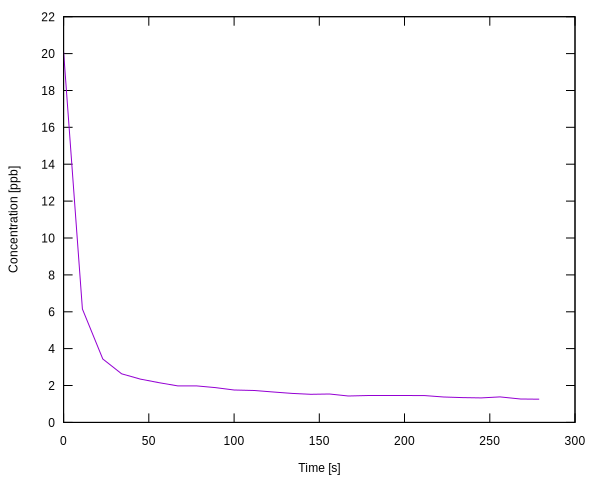

In [30]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [31]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 2, b: 20, t: 10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 2.32436 + -0.00432156*x + 17.7325*exp(-x/7.49008) "

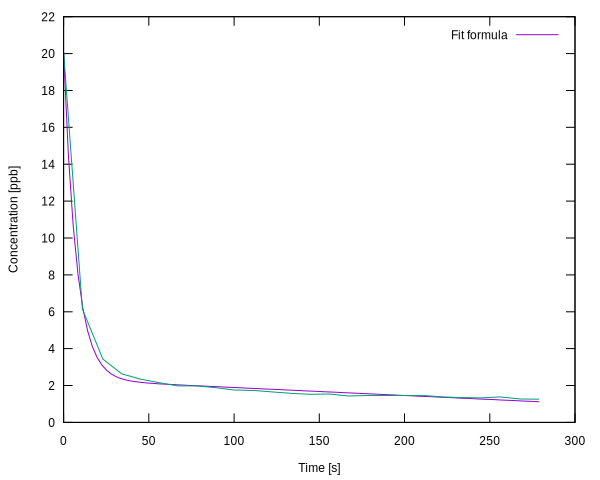

In [32]:
plot_fit << fit[:formula_ds]

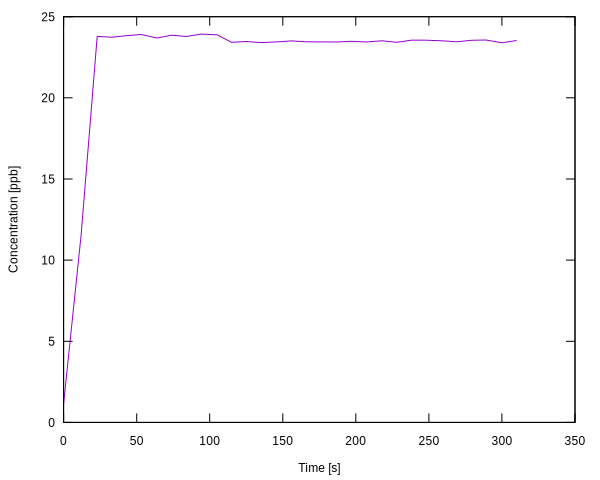

In [15]:
ts_fit3 = ts.row[18..48]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [16]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 23.6877 + -23.2398*exp(-x/11.9292) "

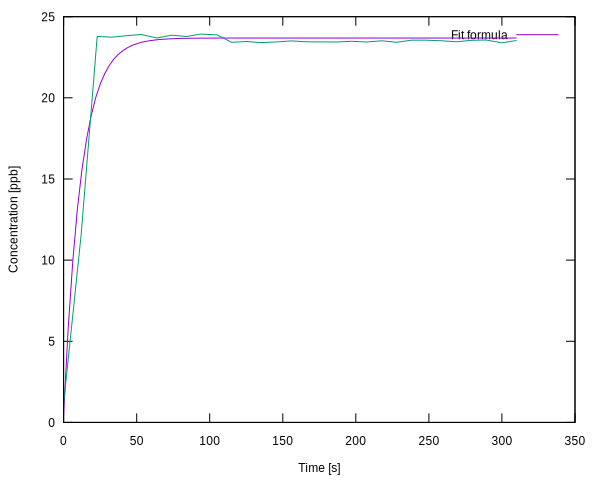

In [17]:
plot_fit3 << fit3[:formula_ds]

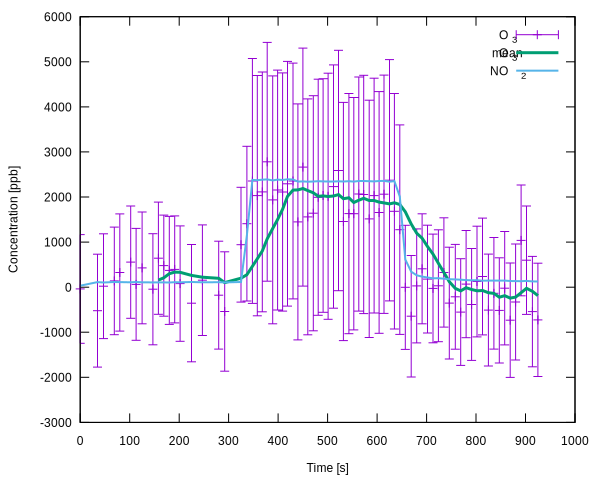

In [33]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [23]:
fit3[:coefficients]

{:a=>23.6877, :b=>-23.2398, :t=>11.9292}

In [24]:
fit3[:deltas]

{:a=>0.2029, :b=>1.043, :t=>1.173}